In [54]:
# Notebook to create basic high-level plots of ENSO and malaria incidence data

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
country_data = pd.read_csv('~/ENSO-malaria-analysis/data/country_info.csv')
oceanic_nino_index_data = pd.read_csv('~/ENSO-malaria-analysis/data/oni_ts.csv')
pf_incidence_data = pd.read_csv('~/ENSO-malaria-analysis/data/PFIncidence_global_admin1.csv')
pf_incidence_data.Year = pd.to_datetime(pf_incidence_data.Year,format="%Y")
# extract ISO codes for African countries
country_data_africa = country_data.loc[country_data['region'] == 'Africa']

# Northern Africa sub-regions not filled in for some reason
country_data_africa['intermediate-region'] = country_data_africa['intermediate-region'].fillna('Northern Africa')
iso_africa = country_data_africa['alpha-3'].unique()

# extract incidence data for African countries
africa_incidence_data = pf_incidence_data.loc[pf_incidence_data['ISO'].isin(iso_africa)]

# group by country-level means
years = africa_incidence_data.Year.unique()
africa_incidence_data = africa_incidence_data.groupby(['ISO', 'Name_0', 'Year'], as_index=False)['incidence_rate_rmean'].mean()


/Users/agastyamondal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
# plot Oceanic Nino Index - mean and max values
oni_yearly_means = oceanic_nino_index_data.groupby('YR', as_index=False)['ANOM'].mean()
oni_yearly_means.columns = ['Year', 'ONI Anomaly (Mean)']

oni_yearly_max = oceanic_nino_index_data.groupby('YR', as_index=False)['ANOM'].max()
oni_yearly_max.columns = ['Year', 'ONI Anomaly (Max)']
oni_yearly = pd.concat([oni_yearly_means.Year, oni_yearly_means['ONI Anomaly (Mean)'], oni_yearly_max['ONI Anomaly (Max)']], axis=1)
oni_yearly = oni_yearly.melt('Year', var_name='cols', value_name='vals')


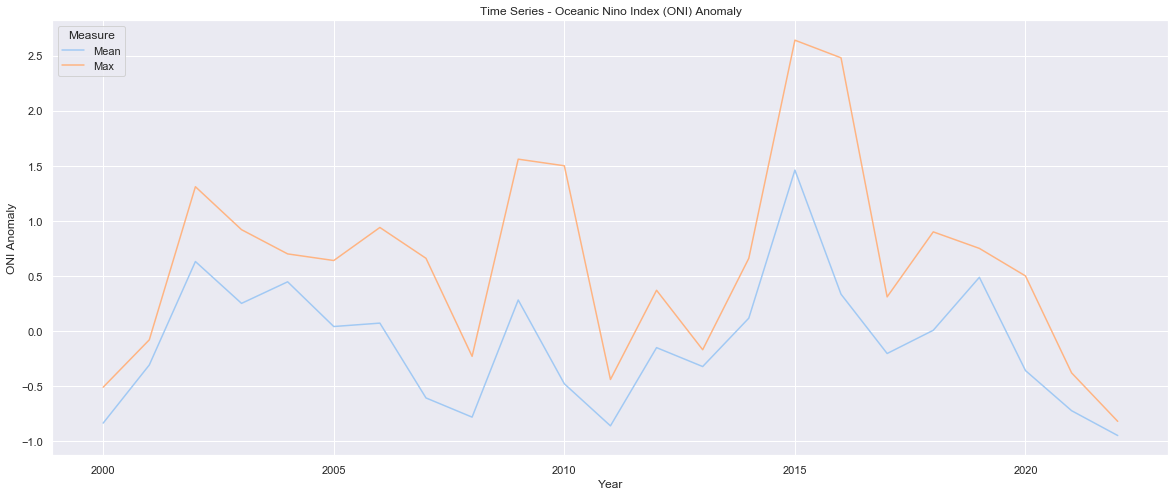

In [77]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,8)})
sns.set_palette("pastel")

oni_yearly = oni_yearly[oni_yearly.Year >= 2000]
ax = sns.lineplot(x="Year", y="vals", hue='cols', data=oni_yearly)
ax.set(ylabel='ONI Anomaly', title='Time Series - Oceanic Nino Index (ONI) Anomaly')
plt.legend(title='Measure', loc='upper left', labels=['Mean', 'Max'])


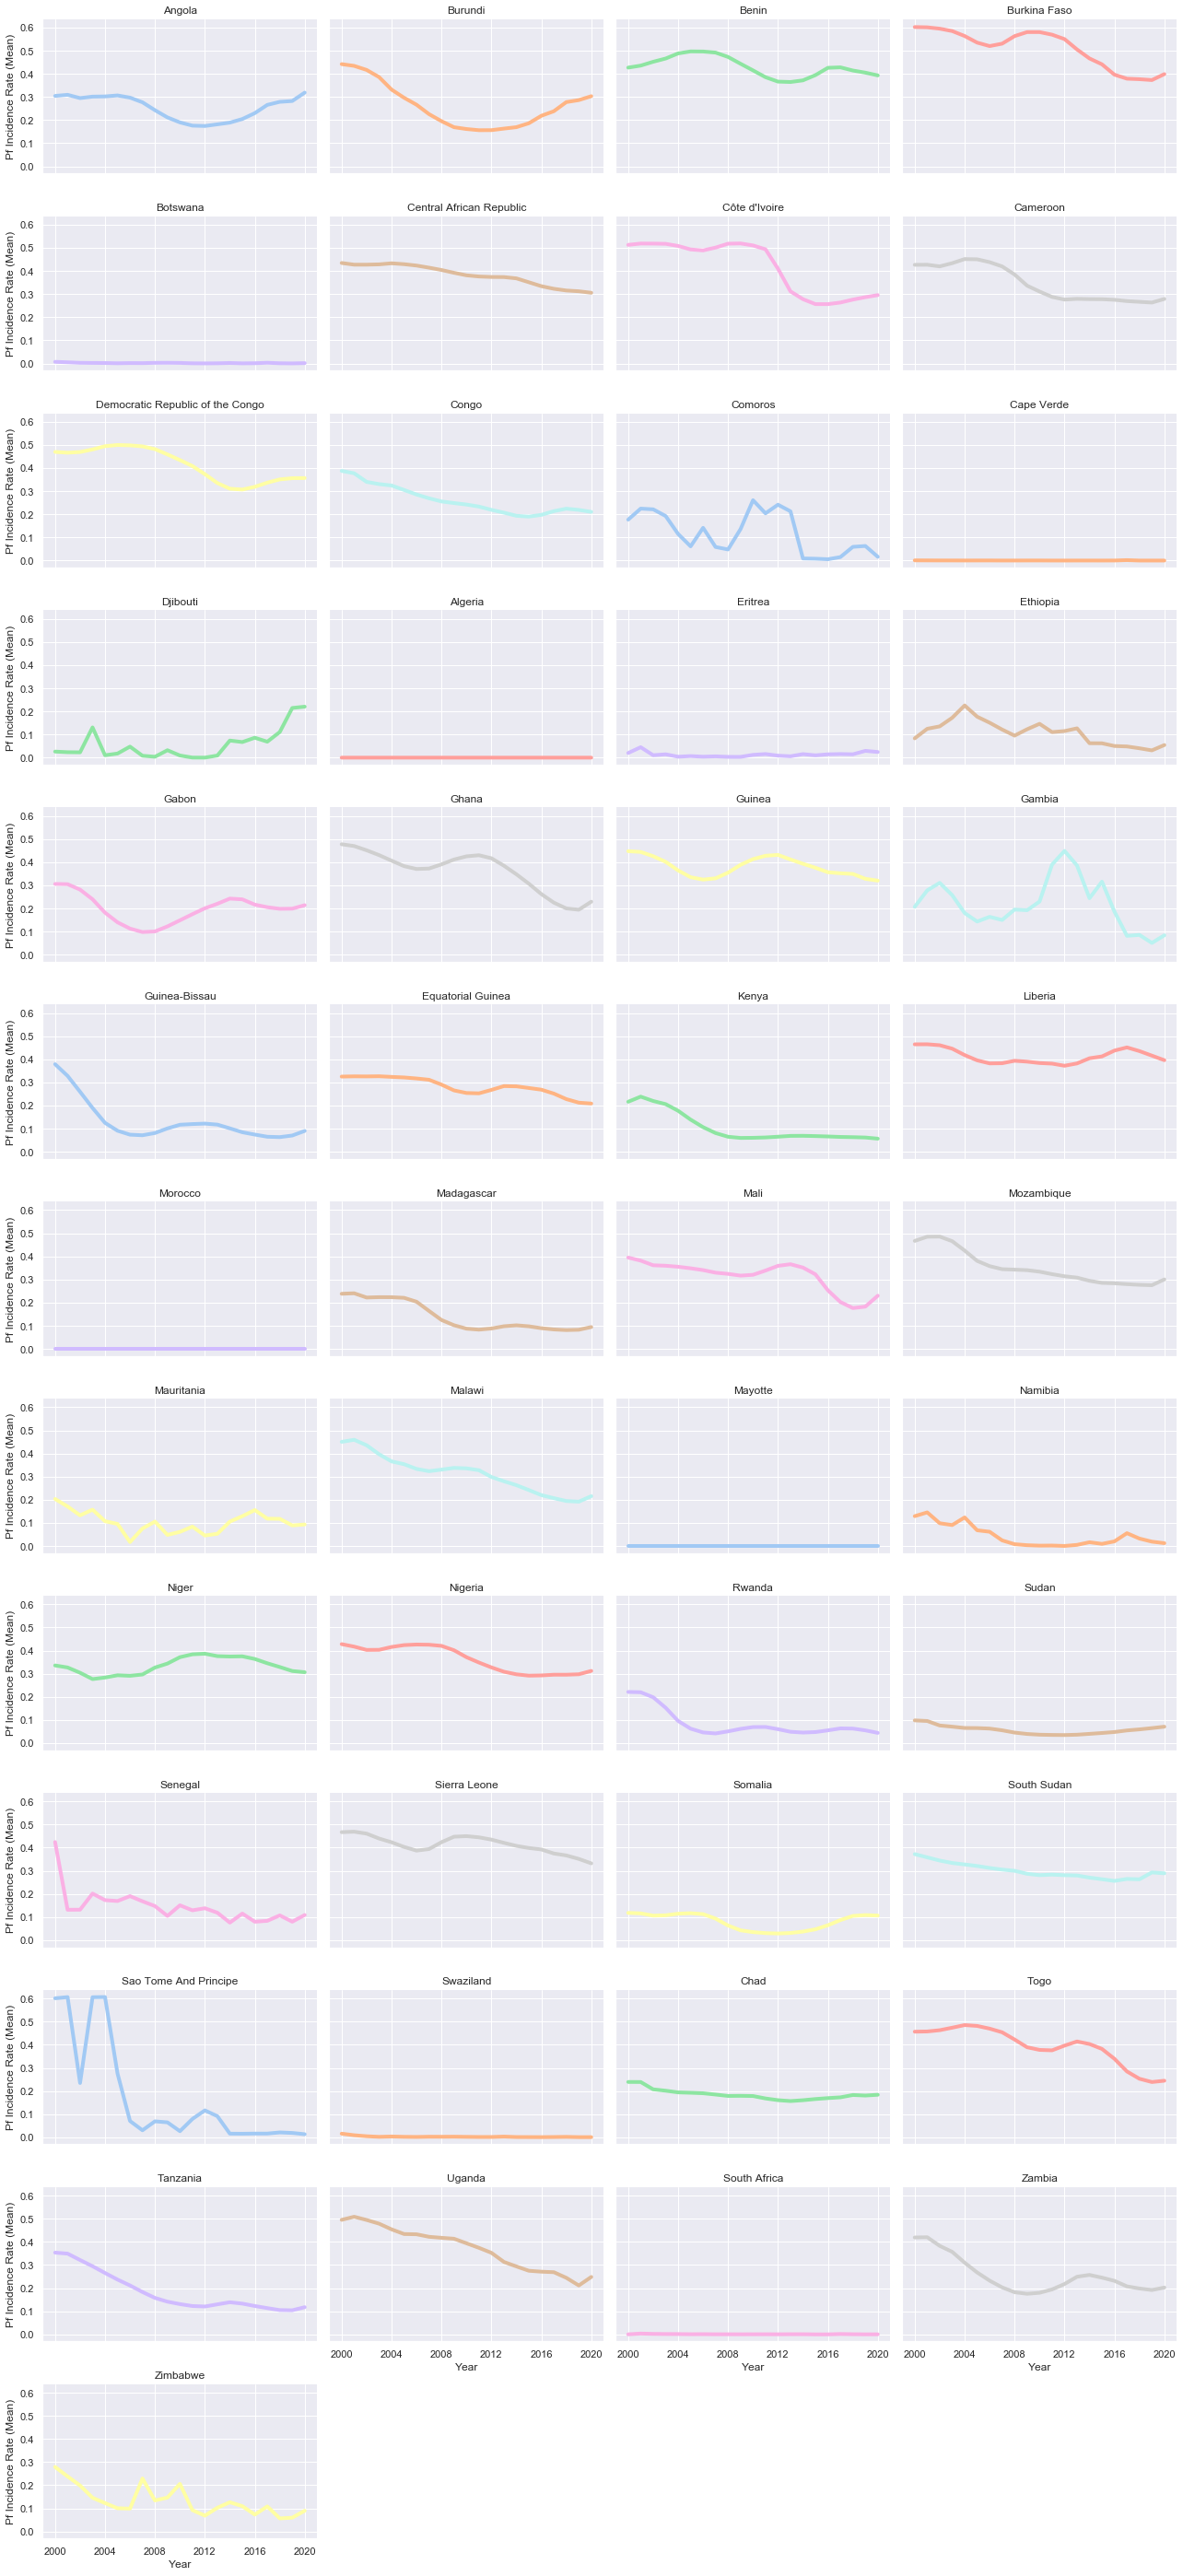

In [57]:
# plot incidence time series for each country 
sns.set_style('darkgrid')

g = sns.relplot(data = africa_incidence_data, x = "Year", y = "incidence_rate_rmean",
                col = "Name_0", hue = "Name_0",
                kind = "line", palette='pastel',
                linewidth = 4, zorder = 5,
                col_wrap = 4, height = 3, aspect = 1.5, legend = False
               )
for time, ax in g.axes_dict.items():
    ax.set_title(time)

g.set_ylabels("Pf Incidence Rate (Mean)")
